In [122]:
# Import basic libraries
import pandas as pd
import numpy as np
import re

# Import additional libraries
import matplotlib.pyplot as plt
%matplotlib inline

# Import libraries for model creation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss, classification_report, confusion_matrix, roc_curve

In [123]:
republicans = pd.read_csv('../../data/republican_tweets.csv', index_col='id')
democrats = pd.read_csv('../../data/democrat_tweets.csv', index_col='id')

data = republicans.append(democrats)

In [124]:
def clean_tweet(tweet):
    cleaned_tweet = re.sub('@\S+', '', tweet) # Remove mentions
    cleaned_tweet = re.sub('https\S+', '', cleaned_tweet) # Remove urls
    cleaned_tweet = re.sub('\S+…', '', cleaned_tweet) # Remove truncated last word
    
    return cleaned_tweet.strip()

In [125]:
data = data.loc[~data.index.duplicated(keep='first')]
data['text'] = data['text'].apply(clean_tweet)

data.shape

(1090, 3)

In [139]:
X_train, X_test, y_train, y_test= train_test_split(data['text'], data['party'], random_state=42)

In [140]:
y_train.head()

id
1180219307709669376    1
1180239923523112960    0
1180116896462585856    0
1180218519507615749    0
1180126249454391298    1
Name: party, dtype: int64

In [141]:
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression())
])

In [142]:
pipe.fit(X_train, y_train)

/home/danailkrzhalovski/Uni/Cognitive_Behavioral_And_Social_Data/TwiterPolitics/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
             

In [143]:
y_preds = pipe.predict(X_test)

In [144]:
y_probas = pipe.predict_proba(X_test)[:, 1]

In [145]:
log_loss(y_test, probabilities, eps=0.000001)

0.6579754356358722

In [146]:
print(classification_report(y_test, y_preds))
print(confusion_matrix(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61       134
           1       0.62      0.61      0.62       139

    accuracy                           0.61       273
   macro avg       0.61      0.61      0.61       273
weighted avg       0.61      0.61      0.61       273

[[82 52]
 [54 85]]


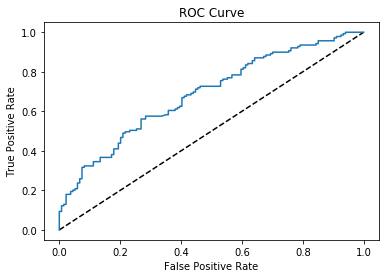

In [147]:
fpr, tpr, thresholds = roc_curve(y_test, y_probas)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [148]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [149]:
logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
vectorizer = CountVectorizer()

In [150]:
vectorizer.fit(data['text'])

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [151]:
logreg_cv.fit(X_train, y_train)

/home/danailkrzhalovski/Uni/Cognitive_Behavioral_And_Social_Data/TwiterPolitics/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
             pre_dispatch='2*n_jobs', refi

In [152]:
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 0.4393970560760795}
0.6340269277845777


In [153]:
logreg_cv.score(X_test, y_test)

0.63003663003663

In [154]:
logreg_cv.score(X_train, y_train)

0.9840881272949816